# Weather Data Analysis Visualisation

Install Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Mount drive & Directories/Paths

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Path to  CSV in Google Drive
file_path = '/content/drive/MyDrive/Weather_Data_Analysis_Project/Weather.csv'

Mounted at /content/drive


# Load data

In [7]:
# Load the dataset
df = pd.read_csv(file_path)

# Preview the data
df.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [8]:
# Convert 'date' column to  datetime
df['date'] = pd.to_datetime(df['date'])

# Set it as index
df.set_index('date', inplace=True)


# Analysis & Insights

## Temperature Trend Over Time

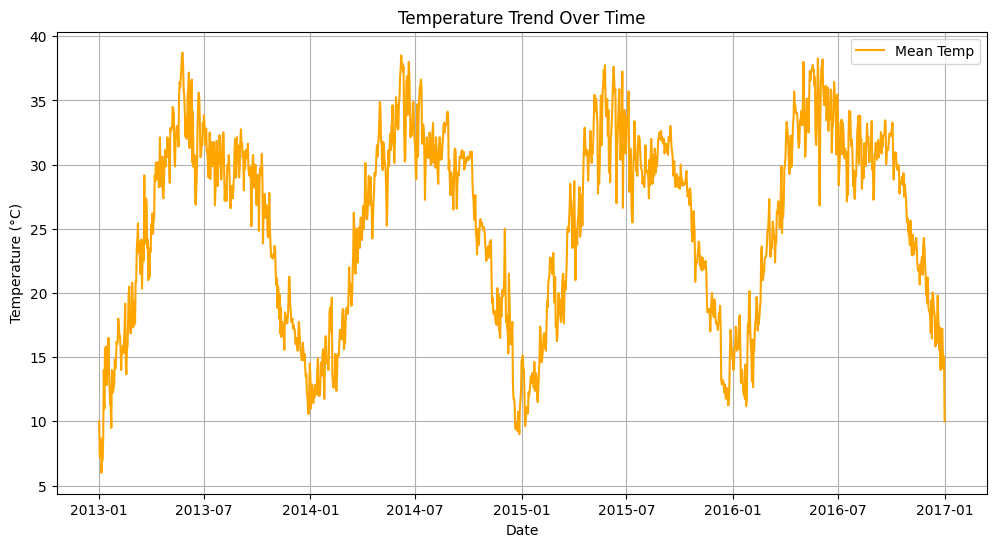

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['meantemp'], color='orange', label='Mean Temp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()


The temperature follows a seasonal cycle with high values in May–June and low values in December–January, reflecting Delhi’s typical summer and winter patterns.

## All Weather Metrics Over Time

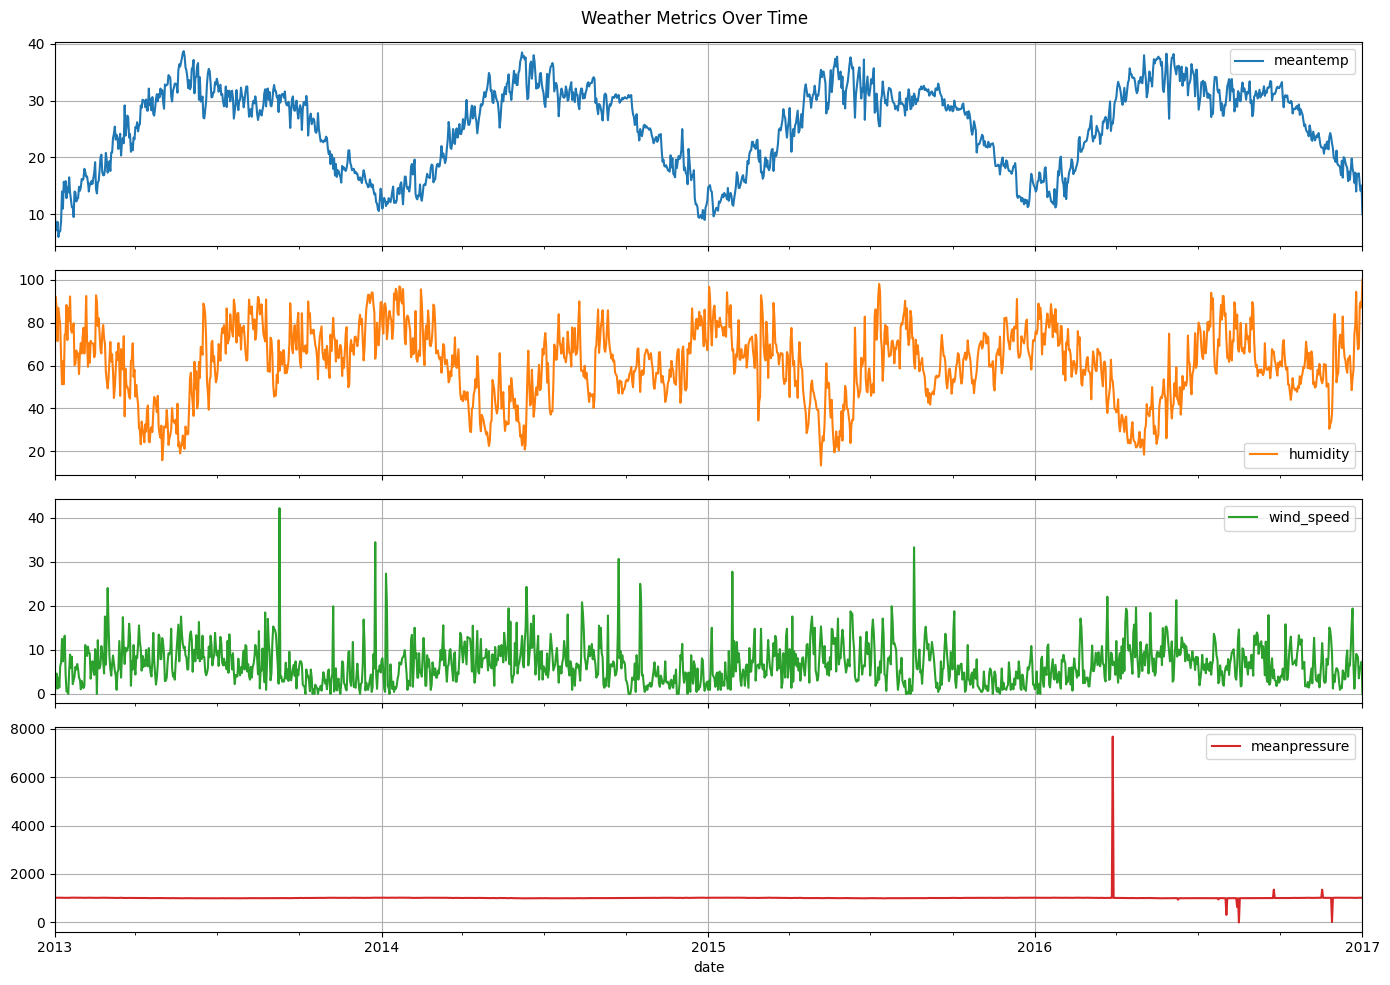

In [10]:
import matplotlib.pyplot as plt

df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].plot(
    subplots=True, figsize=(14, 10), title='Weather Metrics Over Time', grid=True
)
plt.tight_layout()
plt.show()

*   Temperature shows a clear seasonal pattern, with peaks during May–June and dips during December–January each year.
*   Humidity levels rise during the monsoon months (July to September), following a consistent yearly trend.
*   Wind speed remains mostly steady throughout the year, with occasional spikes likely due to weather events.
*  Mean pressure is largely stable, though some extreme values in 2016 suggest possible data recording errors.

## Average Temperature by Month

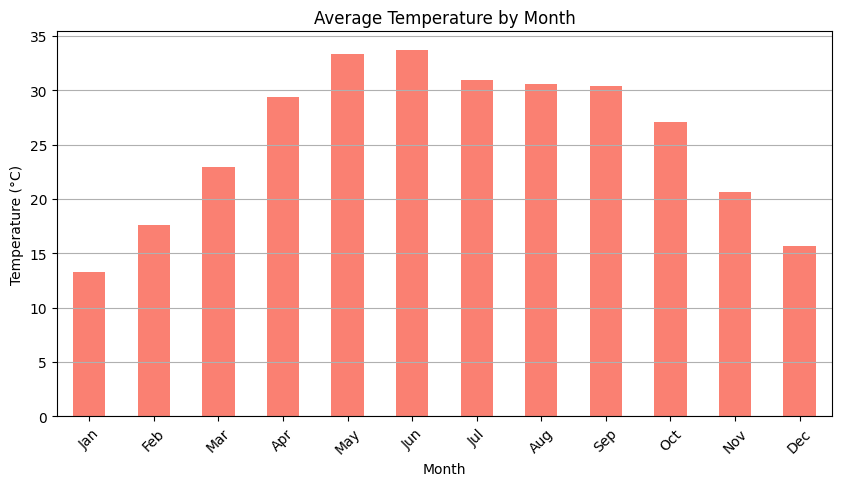

In [11]:
# Extract month from datetime index
df['month'] = df.index.month

# Group by month and compute mean temperature
monthly_avg_temp = df.groupby('month')['meantemp'].mean()

# Plot the result
monthly_avg_temp.plot(kind='bar', color='salmon', figsize=(10,5))
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(axis='y')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.show()


Average temperatures peak during May and June, indicating pre-monsoon heat. Winter months like January & December show the lowest temperatures.

## Correlation Between Weather Variables

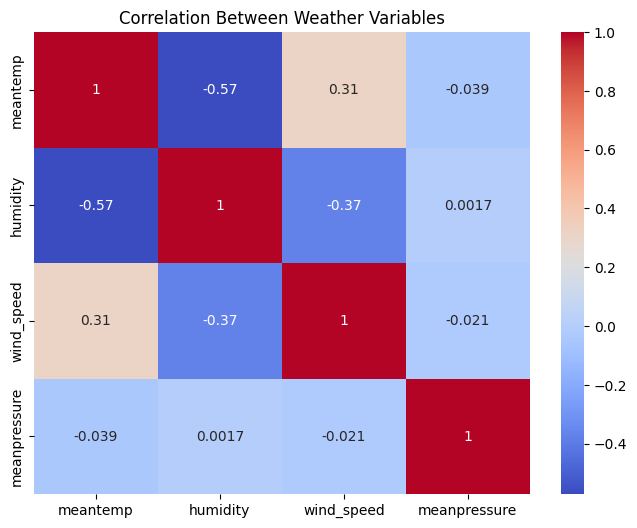

In [12]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Weather Variables')
plt.show()


There is a moderate negative correlation between temperature and humidity, while wind speed shows a weak positive correlation with temperature

## Distribution of Daily Mean Temperature

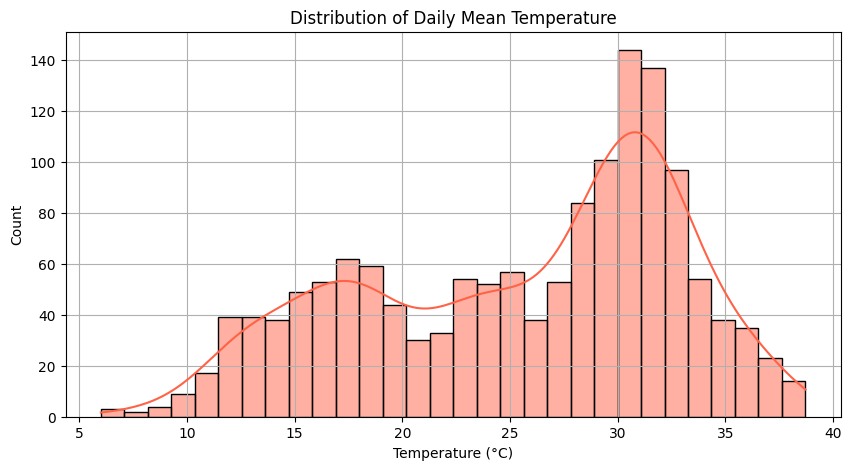

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['meantemp'], kde=True, color='tomato', bins=30)
plt.title('Distribution of Daily Mean Temperature')
plt.xlabel('Temperature (°C)')
plt.grid(True)
plt.show()


Most daily mean temperatures fall between 15°C and 35°C, with a peak frequency around 30°C, indicating generally warm conditions.

## Humidity vs. Mean Temperature Scatter Plot

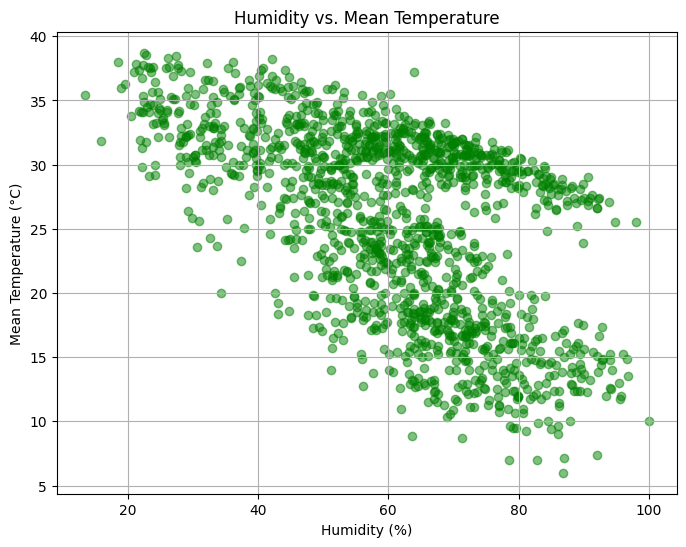

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(df['humidity'], df['meantemp'], alpha=0.5, color='green')
plt.title('Humidity vs. Mean Temperature')
plt.xlabel('Humidity (%)')
plt.ylabel('Mean Temperature (°C)')
plt.grid(True)
plt.show()


The scatter plot shows a clear negative relationship, where higher humidity levels are generally associated with lower mean temperatures